In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns

In [2]:
n = 10
np.random.seed(1)
# 随机生成n个点 p(x,y)
x = np.random.random(n) * 100
y = np.random.random(n) * 100

# 距离矩阵，计算每两个点的距离
dis = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        pi = (x[i],y[i])
        pj = (x[j],y[j])
        dij = math.sqrt((x[j]-x[i])**2 + (y[j]-y[i])**2)
        dis[i,j] = dij

In [3]:
def get(arr, s, e, r):
    if s == e:
        r.append(arr.copy())
    else:
        for i in range(s, e):
            arr[i], arr[s] = arr[s], arr[i]
            get(arr, s + 1, e, r)
            arr[i], arr[s] = arr[s], arr[i]
    return r

In [4]:
r = get(list(range(n)),0,n,[])

In [5]:
values = []

In [6]:
def eval(individual):
    length = 0
    for i in range(len(individual) - 1):
        length = length+dis[individual[i]][individual[i+1]]
    return length

In [7]:
for i in r:
    values.append(eval(i))

In [8]:
df = pd.DataFrame({'values':values})

In [9]:
df.describe()

,values
count,3.628800e+06
mean,4.156498e+02
std,4.338395e+01
min,2.305443e+02
25%,3.860473e+02
50%,4.161959e+02
75%,4.459382e+02
max,5.784664e+02


In [10]:
df['value'] = df['values'].apply(lambda x:int(x))

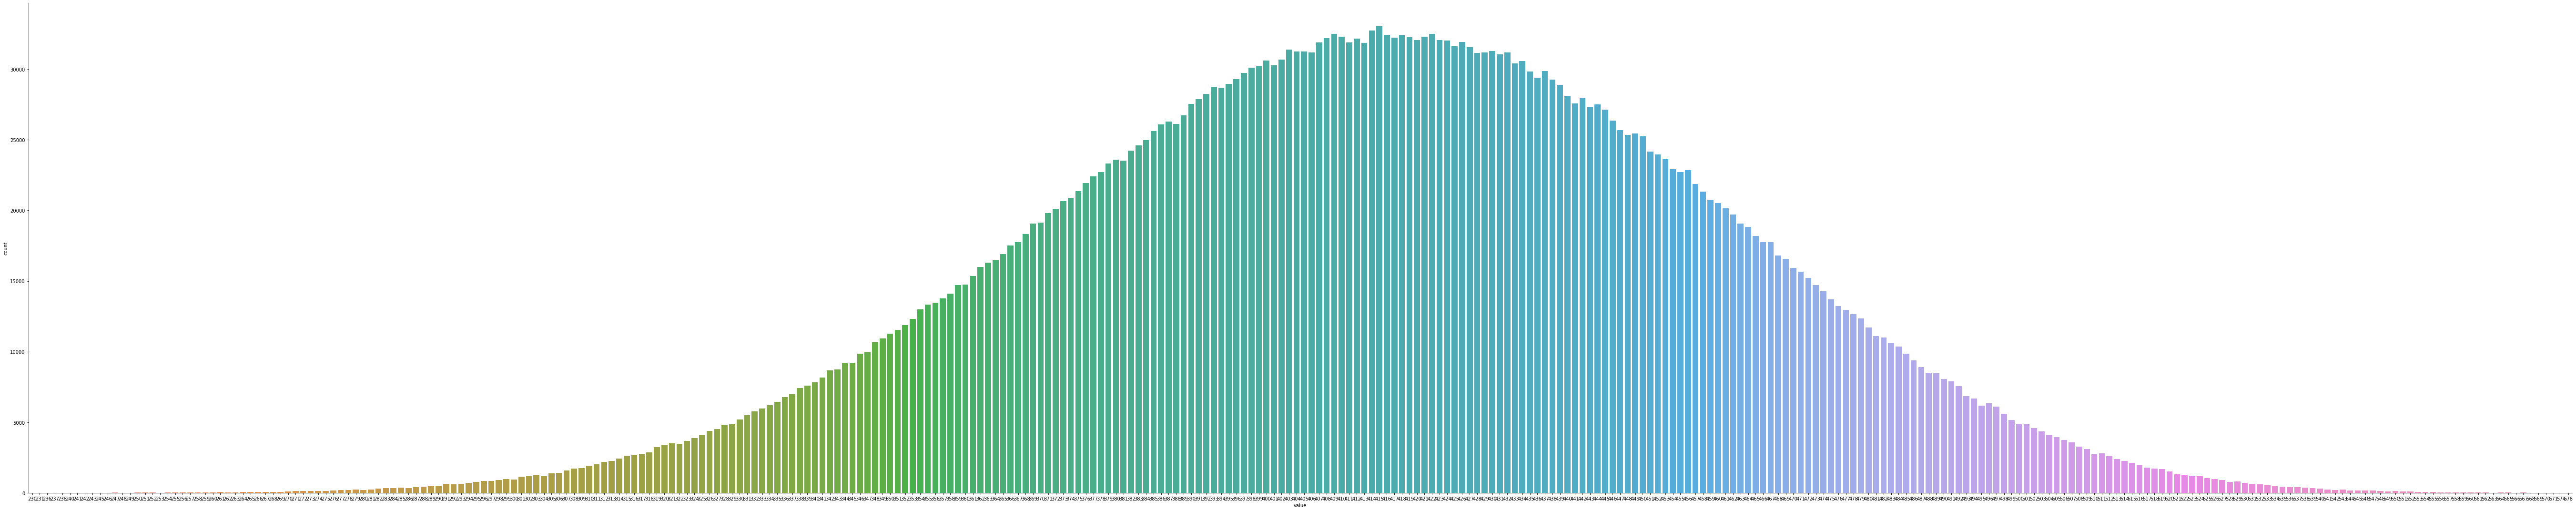

In [11]:
ax = sns.catplot(x="value", data=df, kind = 'count', height = 15,aspect=5)

In [12]:
df['class'] = df['value'].apply(lambda x:(x-x%10))

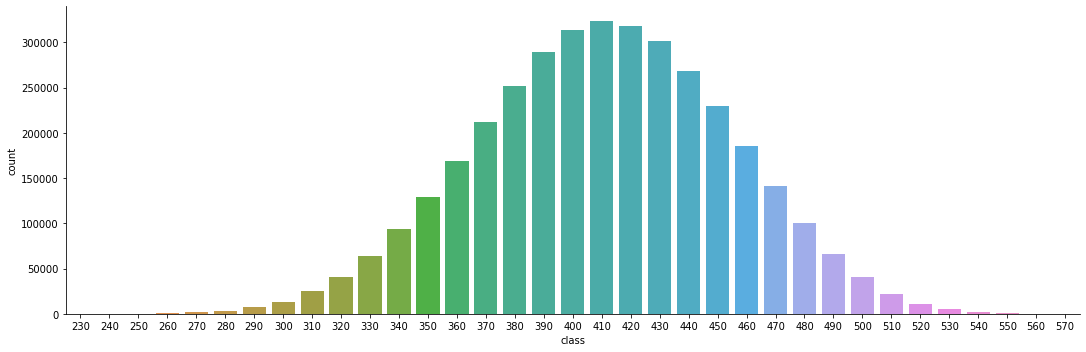

In [13]:
ax = sns.catplot(x="class", data=df, kind = 'count', height = 5,aspect=3)